In [78]:
from sklearn.datasets import make_blobs, make_moons
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

In [2]:
X, _ = make_blobs(n_samples=1000,
                  centers=2,
                  n_features=2,
                  random_state=42)

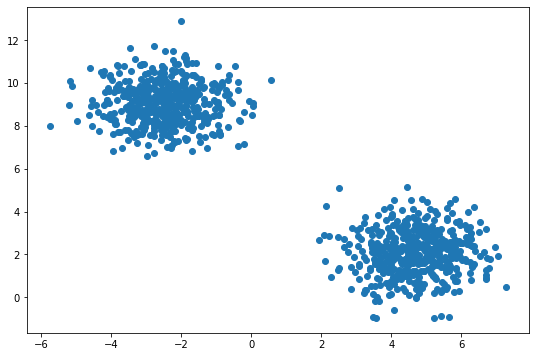

In [3]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [79]:
class KMeans:

    def __init__(self, k):
        self.k = k

    def euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def calc_dists(self, centroids, x):
        distances = []
        for c in centroids:
            dists = [self.euclidean_dist(c, x_point) for x_point in x]
            distances.append(dists)
        return distances

    def fit(self, x):
        np.random.seed(42)    
        # self.centroids = np.random.uniform(low=-20, high=20, size=(self.k, x.shape[1]))
        self.centroids = np.random.rand(self.k, x.shape[1])
        self.final_centroids = None

        done = False
        prev_centroids = self.centroids
        while not done:
            distances = self.calc_dists(prev_centroids, x)
            distances = np.array(distances).reshape(x.shape[0], len(distances))
            labels = [np.argmin(row) for row in distances]

            df = pd.DataFrame(x)
            df['label'] = labels

            new_centroids = []
            for cl in range(self.k):
                cluster = df[df['label'] == cl]
                centroid = np.mean(cluster.loc[:, :1]).values.reshape((1, 2))
                new_centroids.append(centroid)

            new_centroids = np.array(new_centroids).reshape(self.k, 2)

            self.final_centroids = new_centroids
            if prev_centroids.tolist() == new_centroids.tolist():
                break
            else:
                prev_centroids = new_centroids

    def predict(self, x):
        assert len(x.shape) == 2
        
        distances = self.calc_dists(self.final_centroids, x)
        distances = np.array(distances).reshape(x.shape[0], len(distances))
        labels = [np.argmin(row) for row in distances]
        return labels

In [ ]:
# Проведите поиск гиперпараметра с помощью Silluhete score

In [80]:
model = KMeans(2)
model.fit(X)

In [83]:
y = model.predict(X)
print(y[:10])

metrics.silhouette_score(X, y)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 1]


-0.0016602731924993618

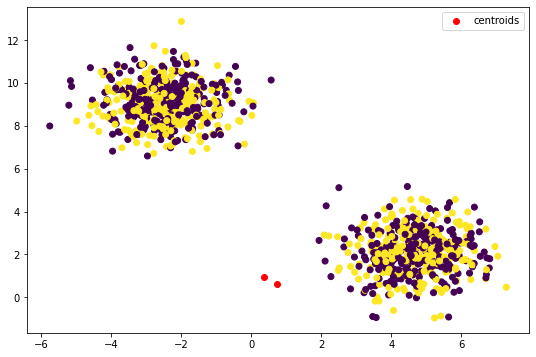

In [84]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.centroids[:,0], model.centroids[:,1], c='red', label='centroids')
plt.legend();

In [ ]:
# Испольуя 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# Найдите лучшее k на данных

In [4]:
np.random.seed(42)
X, _ = make_blobs(n_samples=1000,
                  centers=10,
                  n_features=2,
                  cluster_std=np.random.uniform(low=0.5, high=2, size=(10)),
                  random_state=42)

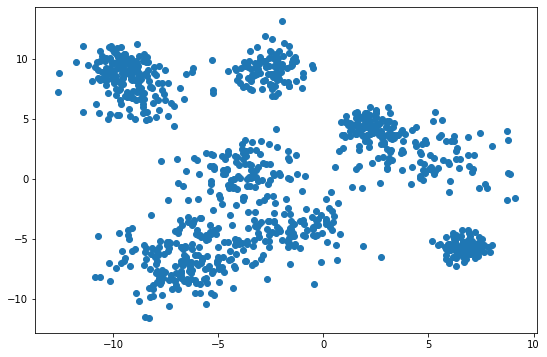

In [5]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])